# A Primer on Monte Carlo Methods
## Andrew Garcia

_Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at_

http://www.apache.org/licenses/LICENSE-2.0
_Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License._

### What are Monte Carlo methods?

Monte Carlo (MC) methods are, typically, computational algorithms which can be used to predict the parameters of a certain event or properties correlated thereof, which tend to relate on the likelihood of these event's occurence.

Thus, MC methods can indirectly predict a property of a feature which is correlated to a certain event, as is the popular example for estimating the value of $\pi$ from the random sampling of points from the area of a circle enclosed by a square (https://academo.org/demos/estimating-pi-monte-carlo/)

### Simulating Chaos: Estimates of distribution spread for independent variables

In the purest sense, MC methods involve sampling from random distributions. We can use python to specify which distribution to draw samples from, though one can also use a specific probability density function (PDFN) were python not able to have the specified PDFN available. 

This sampling can be done easily with python's **numpy.random** module. Obviously enough, were we to sample enough points from a random distribution, we would form said distribution:

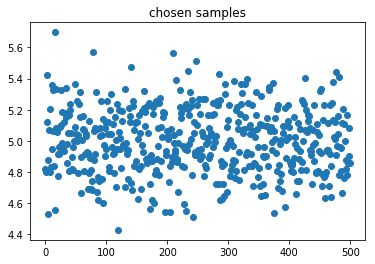

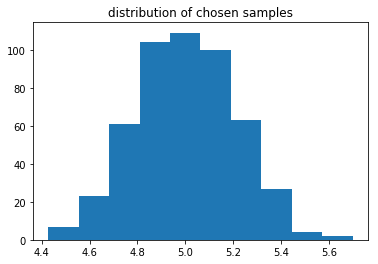

In [31]:
import random
import matplotlib.pyplot as plt

sampleno = 500
mean, sd = 5, 0.2 
k, x = 0, []
while k < sampleno: x.append(random.gauss(mean, sd)); k+=1

plt.figure()
plt.plot(x,'o')
plt.title('chosen samples')
plt.figure()
plt.title('distribution of chosen samples')
plt.hist(x)
plt.show()

Now, let's say for simplicity we studying a variable which we know is a linear combination of two dependent variables X1 and X2:

$Y = C_1 X_1 + C_2 X_2$

Where we assume the coefficients $C_i$ have already been determined. Were we to also know the spread of the dependent variables, the distribution of this independent variable can be estimated with a simple MC algorithm:

1) A sample from $X_1$'s distribution is chosen <br/>
2) A sample from $X_2$'s distribution is chosen <br/>
3) These two samples are operated with the function for $Y$ above <br/>
4) 1-3 is repeated N times to form a distribution for $Y$ 

This can be easily automated with python adapting the previous script shown here:

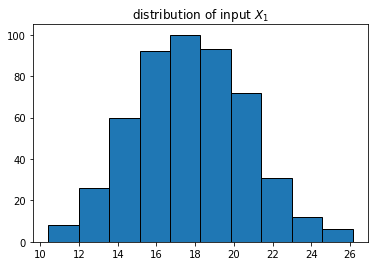

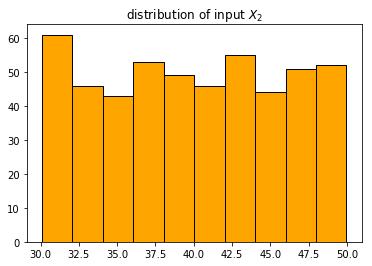

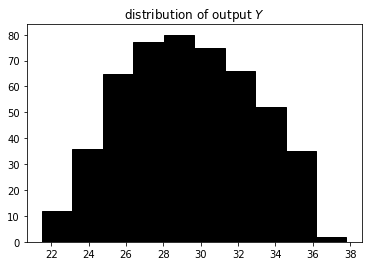

In [77]:
import numpy as np
def distgen(sampleno,dist_type,param1, param2):
    k, x = 0, []
    while k < sampleno: x.append(dist_type(param1,param2)); k+=1
    return np.array(x)

X1 = distgen(500,random.gauss,18, 3)
X2 = distgen(500,random.uniform,30, 50)

C1, C2 = 0.48,0.52
Y = C1*X1 + C2*X2

plt.title('distribution of input $X_1$')
plt.hist(X1,edgecolor='k')
plt.show()
plt.title('distribution of input $X_2$')
plt.hist(X2,color='orange',edgecolor='k')
plt.show()
plt.title('distribution of output $Y$')
plt.hist(Y,color='k',edgecolor='k')
plt.show()

We can then either fit the $Y$ distribution to a PDFN and get the parameters of the fitted distribution (e.g. mean, spread, kurtosis, etc..) or assume the distribution of $Y$ is Gaussian and readily obtain the mean and standard deviation:

In [86]:
print('mean',np.mean(Y))
print('sdev',np.std(Y))

mean 29.30260704607375
sdev 3.4418669721659714
